<a id='initialisation'></a>
___
___
## <font color='coral'>**Appel de l'environment** </font> [▲](#sommaire)

In [1]:
%reset -f
import ipywidgets as widgets
%matplotlib widget
from ipywidgets import Layout, interact
import matplotlib.pyplot as plt
from RVutils import *
import numpy as np
from scipy.stats import linregress
import matplotlib.colors as mcolors
import random

## Set up rc
plt.rcParams['image.cmap'] = 'RdYlBu_r'
plt.rcParams['axes.formatter.limits'] = (-2,3)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.markeredgecolor'] = 'k'
plt.rcParams['lines.markeredgewidth'] = 2.0
plt.rc('font',size=18)
me = (0.1,0.1) #Markevery

#color_array = ['b','g','r','c','m','y','k','xkcd:'

#Size of figures
dpi_laptop = 50; dpi_cadarache = 65; dpi_home = 100
dpi_custom = dpi_home

# Get the xkcd color names
xkcd_names = list(mcolors.XKCD_COLORS.keys())

# Generate an array of 20 random xkcd color names
random.seed(57)  # Set the random seed for reproducibility
color_names = random.sample(xkcd_names, 20)

# Convert the color names to RGB values
color_array = [mcolors.XKCD_COLORS[name] for name in color_names]


## <font color='coral'>**Chargement des données** </font> [▲](#sommaire)

In [3]:
q05_v0   = hdf5_to_dict("data/q05_neo_v0.hdf5")  ;q05_v0['title']   = 'q05_v0'   ; q05_v0['c'] = color_array[0]
q05_v05  = hdf5_to_dict("data/q05_neo_v05.hdf5") ;q05_v05['title']  = 'q05_v05' ; q05_v05['c'] = color_array[1]
q05_v025 = hdf5_to_dict("data/q05_neo_v025.hdf5");q05_v025['title'] = 'q05_v025'; q05_v025['c'] = color_array[2]
q05_vm05 = hdf5_to_dict("data/q05_neo_vm05.hdf5");q05_vm05['title'] = 'q05_vm05'; q05_vm05['c'] = color_array[3]
q05_v1   = hdf5_to_dict("data/q05_neo_v1.hdf5")  ;q05_v1['title']   = 'q05_v1'  ; q05_v1['c'] = color_array[4]
q05_vm1  = hdf5_to_dict("data/q05_neo_vm1.hdf5") ;q05_vm1['title']  = 'q05_vm1' ; q05_vm1['c'] = color_array[5]

q15_v0_new   = hdf5_to_dict("data\q15_neo_v0_collnstep1_nmu64.hdf5"); q15_v0_new['title']    = 'q15_v0_collnstep1' ; q15_v0_new['c']   = color_array[6]
q15_v05_new  = hdf5_to_dict("data\q15_neo_v05_collnstep1_nmu64.hdf5");q15_v05_new['title']   = 'q15_v05_collnstep1'; q15_v05_new['c']  = color_array[7]
q15_v025_new = hdf5_to_dict("data\q15_neo_v025_collnstep1_nmu64.hdf5");q15_v025_new['title'] = 'q15_v025_collnstep1';q15_v025_new['c'] = color_array[8]
q15_vm05_new = hdf5_to_dict("data\q15_neo_vm05_collnstep1_nmu64.hdf5");q15_vm05_new['title'] = 'q15_vm05_collnstep1';q15_vm05_new['c'] = color_array[9]
q15_v1_new   = hdf5_to_dict("data\q15_neo_v1_collnstep1_nmu64.hdf5");  q15_v1_new['title']   = 'q15_v1_collnstep1' ;q15_v1_new['c']    = color_array[10]
q15_vm1_new  = hdf5_to_dict("data\q15_neo_vm1_collnstep1_nmu64.hdf5"); q15_vm1_new['title']  = 'q15_vm1_collnstep1';q15_vm1_new['c']   = color_array[11]

q15_v0   = hdf5_to_dict("data/q15_neo_v0.hdf5")  ;q15_v0['title']   = 'q15_v0_collnstep5'  ; q15_v0['c']   = change_hue(q15_v0_new['c']); q15_v0['ls']     = '--'
q15_v05  = hdf5_to_dict("data/q15_neo_v05.hdf5") ;q15_v05['title']  = 'q15_v05_collnstep5' ; q15_v05['c']  = change_hue(q15_v05_new['c']); q15_v05['ls']   = '--'
q15_v025 = hdf5_to_dict("data/q15_neo_v025.hdf5");q15_v025['title'] = 'q15_v025_collnstep5'; q15_v025['c'] = change_hue(q15_v025_new['c']); q15_v025['ls'] = '--'
q15_vm05 = hdf5_to_dict("data/q15_neo_vm05.hdf5");q15_vm05['title'] = 'q15_vm05_collnstep5'; q15_vm05['c'] = change_hue(q15_vm05_new['c']); q15_vm05['ls'] = '--'
q15_v1   = hdf5_to_dict("data/q15_neo_v1.hdf5")  ;q15_v1['title']   = 'q15_v1_collnstep5'  ; q15_v1['c']   = change_hue(q15_v1_new['c']); q15_v1['ls']     = '--'
q15_vm1  = hdf5_to_dict("data/q15_neo_vm1.hdf5") ;q15_vm1['title']  = 'q15_vm1_collnstep5' ; q15_vm1['c']  = change_hue(q15_vm1_new['c']); q15_vm1['ls']   = '--'

#q15_vm05_collnstep1 = hdf5_to_dict("data/q15_neo_vm05_collnstep1.hdf5");q15_vm05_collnstep1['title'] = 'q15_vm05_collnstep1'; q15_vm05_collnstep1['c'] = color_array[10]

print(q05_v05.keys())

all_sim = [q05_v1, q05_v05, q05_v025, q05_v0, q15_v1, q15_v05, q15_v025, q15_v0, q05_vm05, q05_vm1, q15_vm05, q15_vm1, q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]

## Definintion of custom widgets used in interactive plots
custom_widgets = {'dpi_adjust' : widgets.IntSlider(min=30, max=200, step=1,value=dpi_custom, continuous_update=False),
                  'param'      : widgets.Text(value='VP',placeholder='Type something',description='Select parameter:', continuous_update=False),
                  'select_sim' : widgets.SelectMultiple(options=[q['title'] for q in all_sim], value=[q['title'] for q in [all_sim[0], all_sim[-1]]], description='Simulations')}

dict_keys(['ls', 'As', 'Er', 'Er_00', 'Gamma_vD', 'Gamma_vE', 'Gamma_vEn0', 'Gamma_vEndiff0', 'Isq', 'Phi00', 'PhiFSavg', 'Ppar', 'Pperp', 'Qpar_vD', 'Qpar_vE', 'Qpar_vEn0', 'Qperp_vD', 'Qperp_vE', 'Qperp_vEn0', 'RSphi_vD', 'RSphi_vE', 'RSphi_vEn0', 'RSpol_vD', 'RSpol_vE', 'RSpol_vEn0', 'T', 'Ts0', 'VP', 'VT', 'Zs', 'delta_n_avg', 'eps', 'n', 'ns0', 'nu_i', 'nustar', 'q', 'rg', 'rho', 'spreading_0deg', 'spreading_180deg', 'spreading_270deg', 'spreading_90deg', 'spreading_FSavg', 'time', 'title', 'c'])


## <font color='springgreen'>**Travail en cours**</font> - Plot time evolution of $V_P$ [▲](#sommaire)

interactive(children=(Text(value='VP', continuous_update=False, description='Select parameter:', placeholder='…

<function __main__.update_plot(param, float_range_rho, float_range_time, bool_second_membre, bool_rprof, select_sim, dpi_adjust)>

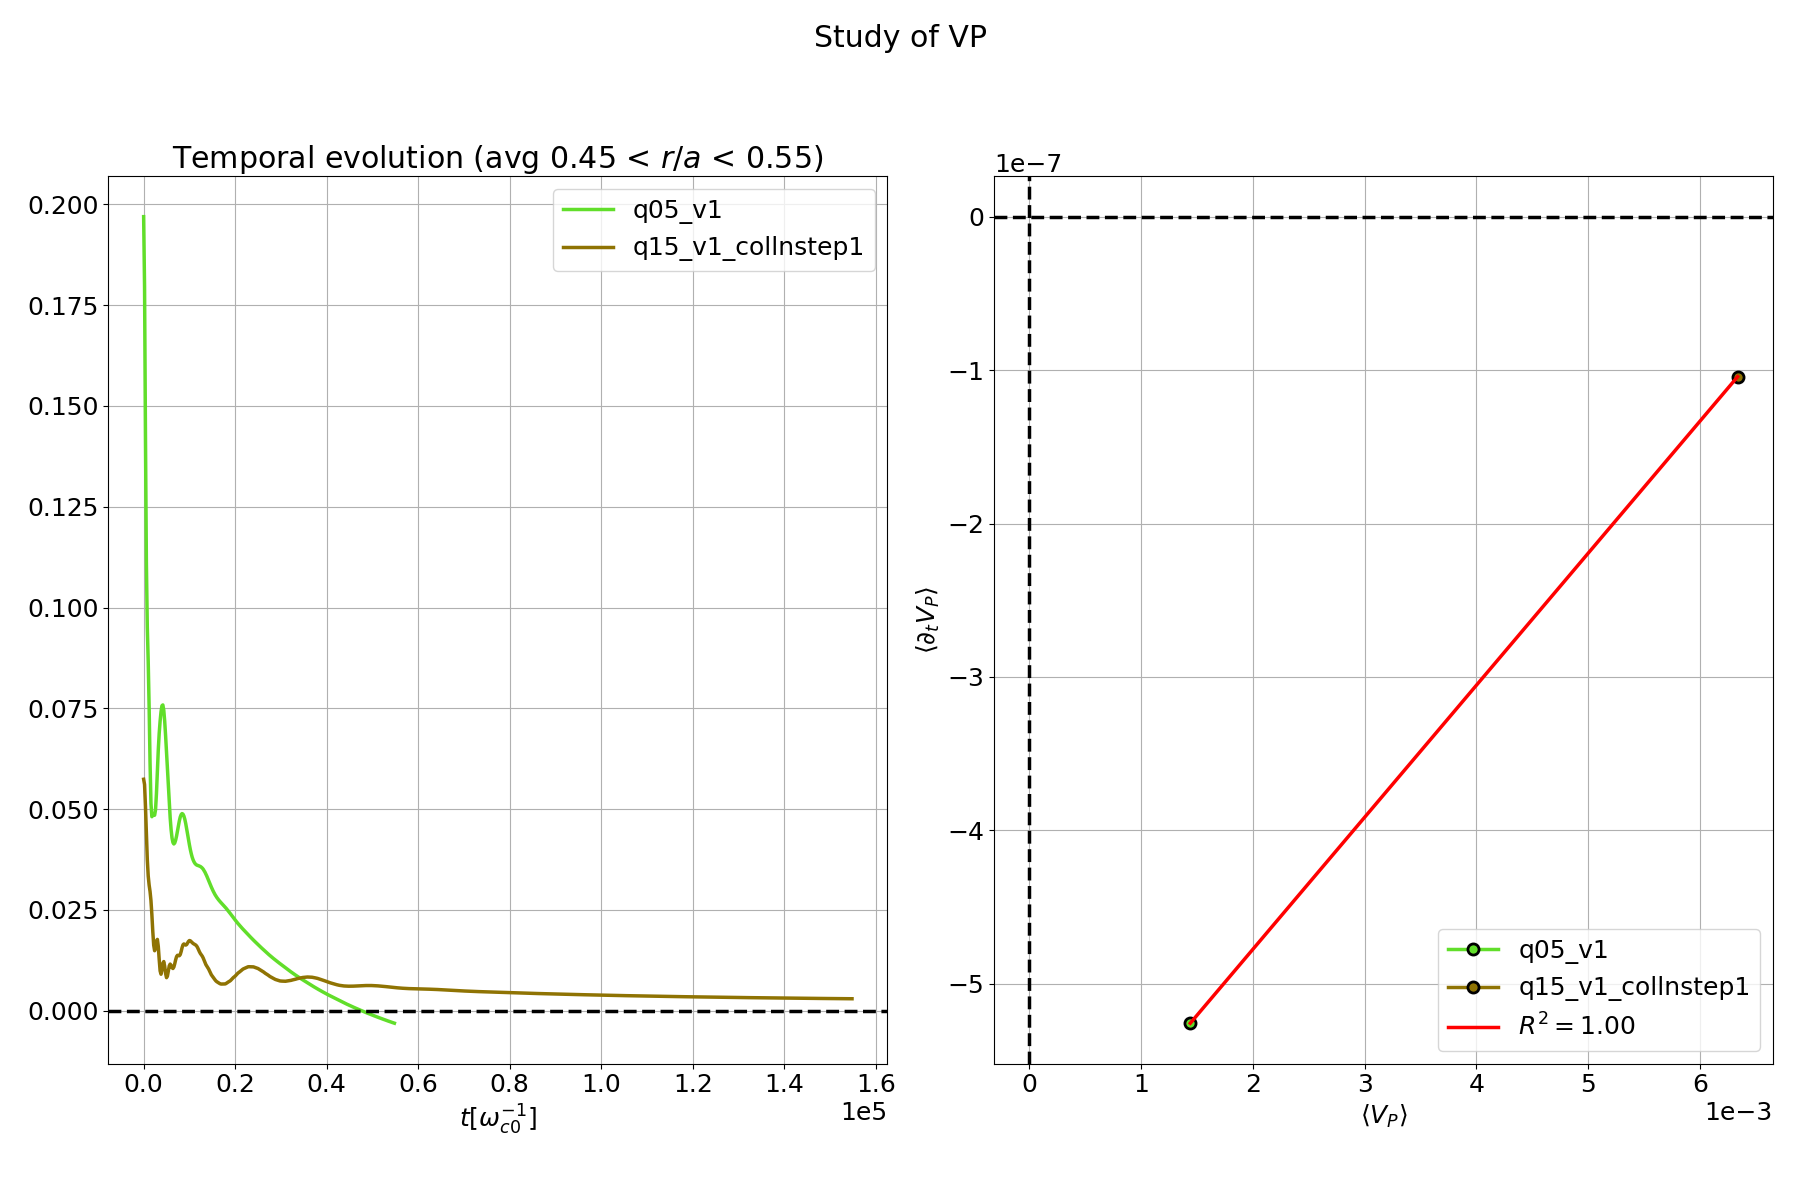

In [4]:
import matplotlib.gridspec as gridspec

plt.close('all')

fig = plt.figure(figsize=(18,12))



def update_plot(param,float_range_rho,float_range_time,bool_second_membre,bool_rprof,
                select_sim,dpi_adjust):

    q_ar = [q for q in all_sim if q['title'] in select_sim]
    tmin_avg  ,tmax_avg   = float_range_time
    rhomin_avg,rhomax_avg = float_range_rho

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    fig.clf()

    nb_plots = 2 + bool_rprof
    gs = gridspec.GridSpec(1, nb_plots, figure=fig)

    ax_tevol = fig.add_subplot(gs[bool_rprof])
    ax_reg = fig.add_subplot(gs[bool_rprof+1])

    if bool_rprof:gssub = gs[0].subgridspec(len(q_ar),1)

    ## Set axes customizations
    ax_tevol.set_title(r'Temporal evolution (avg %.2f < $r/a$ < %.2f)' % (rhomin_avg , rhomax_avg) )
    fig.suptitle(r'Study of %s' %param)
    
    ## Define VP_x and dtVP_y for linear regression
    VP_x = np.array([]); dtVP_y = np.array([])

    for iq,q in enumerate(q_ar):

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(q['rho'],[rhomin_avg,rhomax_avg])

        if bool_rprof:
            ax_rprof = fig.add_subplot(gssub[iq,0])
            ax_rprof.set_title(q['title'])
            if iq!=(len(q_ar)-1):
                ax_rprof.set_xticks([])
            else:
                ax_rprof.set_xlabel(r'$r/a$')
            ax_rprof.axvline(x=1,c='k',ls='--')
            ## Plot radial profile every 100 steps with a gradient of color
            for it in range(0,len(q['time']),30):
                c = plt.cm.RdYlBu_r(it/len(q['time']))
                ax_rprof.plot(q['rho'],q[param][it,:],c=c)
            ax_rprof.set_ylim(-0.05,0.08)

        ## Plot temporal evolution
        if not bool_second_membre:ax_tevol.plot(q['time'], np.mean( q[param][:,irhomin:irhomax],axis=1),c=q['c'],label=q['title'])
        else:ax_tevol.plot(q['time'], np.mean( q[param][:,irhomin:irhomax],axis=1) - np.mean( q[param][-1,irhomin:irhomax],axis=0),c=q['c'],label=q['title'])
        # ax_tevol.axvline(x=q['time'][itmin_avg],c='k',ls='--')
        # ax_tevol.axvline(x=q['time'][itmax_avg],c='k',ls='--')

        # if iq==0:
        #     for it,t in enumerate(q['time'][itmin_avg:itmax_avg]):
        #         ax_tevol.axvline(x=t,c='k',ls='--',alpha=0.5)

        ## Append VP_x and dtVP_y for linear regression
        if not bool_second_membre:VP_x_to_add = np.mean(q['VP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1))
        else:VP_x_to_add = np.mean(q['VP'][itmin_avg:itmax_avg,irhomin:irhomax]-q['VP'][itmax_avg,irhomin:irhomax],axis=(0,1))

        # VP_x = np.append(VP_x,np.mean(q['VP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))
        VP_x = np.append(VP_x,VP_x_to_add)
        dtVP_y = np.append(dtVP_y,np.mean(q['dtVP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=(0,1)))

        ## Plot points in VP, dtVP space
        ax_reg.plot( VP_x[-1], dtVP_y[-1], c=q['c'], marker='o', label=q['title'])
        
    ## Linear regression
    print(VP_x)
    slope, intercept, r_value, p_value, std_err = linregress(VP_x,dtVP_y)
    
    ## Plot linear regression
    ax_reg.plot(VP_x, intercept + slope*VP_x, 'r', label=r'$R^2 = %.2f$' % (r_value**2))
    ax_reg.set_xlabel(r'$\langle V_P \rangle$')
    ax_reg.set_ylabel(r'$\langle \partial_t V_P \rangle$')
    ax_reg.axhline(y=0,c='k',ls='--')
    ax_reg.axvline(x=0,c='k',ls='--')

    ## Axes customizations
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')
    ax_tevol.axhline(y=0,c='k',ls='--')
    ax_tevol.legend(); ax_reg.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
float_range_time_slider = widgets.FloatRangeSlider(value=[40e3, 50e3], min=0, max=170e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)
float_range_rho_slider  = widgets.FloatRangeSlider(value=[0.45, 0.55], min=0.1, max=1.3, step=0.01, description='rho range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_time = float_range_time_slider,
         float_range_rho  = float_range_rho_slider,
         bool_second_membre = widgets.Checkbox(value=False,description='Sans second membre',disabled=False),
         bool_rprof = widgets.Checkbox(value=False,description='Plot radial profiles',disabled=False),
         **custom_widgets
        )

## <font color='springgreen'>**Travail en cours**</font> - Get $\nu_\theta$ profile

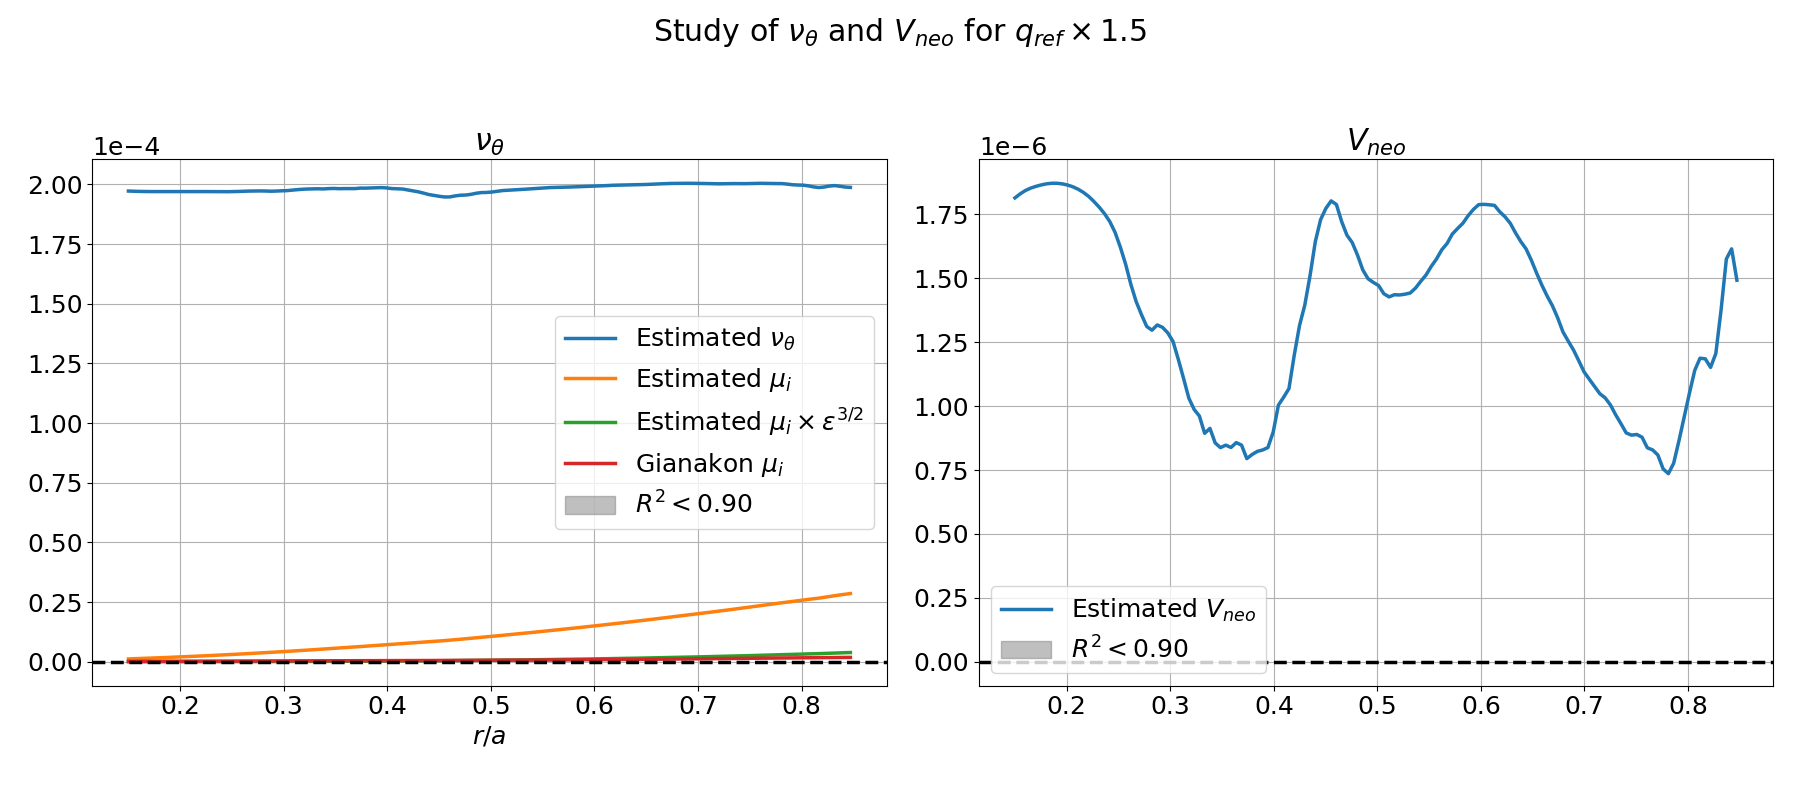

In [5]:
plt.close('all')

fig = plt.figure(figsize=(18,8))

bool_second_member = False

q05_bool = False
q15_bool = not q05_bool

if q05_bool:
    q_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
    tmin_avg  ,tmax_avg   = 40e3, 50e3
    fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{REF} \times 0.5$')

if q15_bool:
    q_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
    tmin_avg  ,tmax_avg   = 135e3, 145e3
    fig.suptitle(r'Study of $\nu_\theta$ and $V_{neo}$ for $q_{ref} \times 1.5$')

rhomin_avg,rhomax_avg = 0.15, 0.85

#VP_x = np.array([]); dtVP_y = np.array([])

for iv,v in enumerate(q_ar):
        
    itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
    irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

    if bool_second_member:VP_x0 = np.mean(v['VP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    else:VP_x0 = np.mean(v['VP'][itmin_avg:itmax_avg,irhomin:irhomax]-v['VP'][itmax_avg,irhomin:irhomax],axis=(0))
    dtVP_y0 = np.mean(v['dtVP'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    if iv==0:
        VP_x = VP_x0[np.newaxis,:]
        dtVP_y = dtVP_y0[np.newaxis,:]

    ## Append VP_x and dtVP_y for linear regression
    else:
        VP_x = np.append(VP_x,VP_x0[np.newaxis,:],axis=0)
        dtVP_y = np.append(dtVP_y,dtVP_y0[np.newaxis,:],axis=0)
    
# ## Linear regression
slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

for ir in range(irhomax-irhomin):
    slope, intercept, r_value, p_value, std_err = linregress(VP_x[:,ir],dtVP_y[:,ir])
    slope_ar     = np.append(slope_ar,slope)
    intercept_ar = np.append(intercept_ar,intercept)
    r_value_ar   = np.append(r_value_ar,r_value)
    p_value_ar   = np.append(p_value_ar,p_value)
    std_err_ar   = np.append(std_err_ar,std_err)

nutheta_estimated = -slope_ar
Vneo_estimated    = intercept_ar/slope_ar
mui_gianakon      = np.mean(q_ar[0]['nutheta_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
nu_i              = np.mean(q_ar[0]['nu_i'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

inertia_factor = ((1+2*q_ar[0]['q']**2) * (q_ar[0]['eps']/q_ar[0]['q'])**2 )[irhomin:irhomax]
eps = q_ar[0]['eps'][irhomin:irhomax]

rho  = q_ar[0]['rho'][irhomin:irhomax]
qabs = q_ar[0]['q'][irhomin:irhomax]

xcoord = rho

ax_nutheta = fig.add_subplot(121); ax_nutheta.set_title(r'$\nu_\theta$')
ax_nutheta.plot(xcoord,nutheta_estimated,label=r'Estimated $\nu_\theta$')
# ax_nutheta.plot(xcoord,nutheta_estimated*(1+2*q_ar[0]['q'][irhomin:irhomax]**2) * q_ar[0]['eps'][irhomin:irhomax],label=r'Estimated $\nu_\theta*(1+2q^2)\varepsilon$')
ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor,label=r'Estimated $\mu_i$')
ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor*eps**(3/2),label=r'Estimated $\mu_i \times \varepsilon^{3/2}$')
#ax_nutheta.plot(xcoord,nutheta_estimated*(1+q_ar[0]['q'][irhomin:irhomax]**2) * (q_ar[0]['eps'][irhomin:irhomax]/q_ar[0]['q'][irhomin:irhomax])**2,label=r'Estimated $\nu_\theta*(1+q^2)\varepsilon$')
ax_nutheta.plot(xcoord,mui_gianakon,label=r'Gianakon $\mu_i$')
# ax_nutheta.plot(xcoord,mui_gianakon* (q_ar[0]['q'][irhomin:irhomax]/q_ar[0]['eps'][irhomin:irhomax])**2,label=r'Gianakon $\mu_i \times \left( q/\varepsilon \right)^2 $')
# ax_nutheta.plot(xcoord,nu_i,label=r'$\nu_i$')
if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
else:ax_nutheta.set_xlabel(r'$q$')

ax_vneo = fig.add_subplot(122); ax_vneo.set_title(r'$V_{neo}$')
ax_vneo.plot(q_ar[0]['rho'][irhomin:irhomax],Vneo_estimated,label=r'Estimated $V_{neo}$')

## Fill a x zone with a color where the R^2 is above a threshold
lim = 0.9
for axes in [ax_nutheta,ax_vneo]:
    ymin = axes.get_ylim()[0]
    ymax = axes.get_ylim()[1]
    axes.fill_between(q_ar[0]['rho'][irhomin:irhomax],ymin,ymax,where=r_value_ar**2<lim,color='grey',alpha=0.5,label=r'$R^2<%.2f$'%lim)
    axes.legend()
    
    axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


## <font color='springgreen'>**Travail en cours**</font> - Compare $\nu_\theta$ profiles

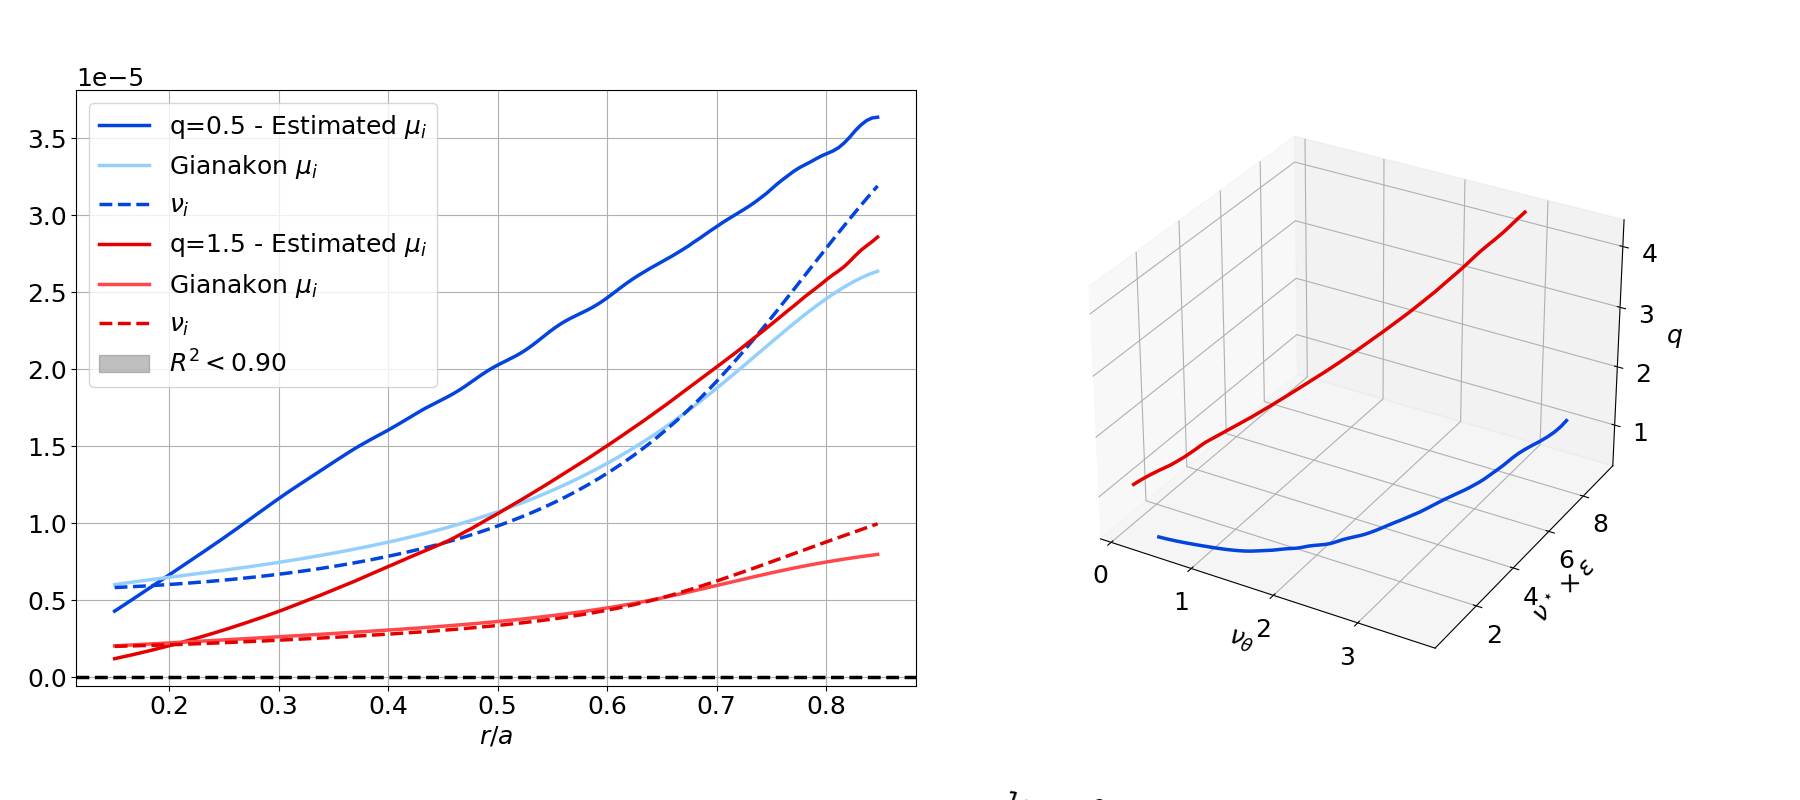

In [27]:
plt.close('all')

fig = plt.figure(figsize=(18,8))

ax_nutheta = fig.add_subplot(121)#; ax_nutheta.set_title(r'$\nu_\theta$')
ax_3d = fig.add_subplot(122,projection='3d')
#ax_vneo = fig.add_subplot(133); ax_vneo.set_title(r'$V_{neo}$')


bool_second_member = False

q05_bool = False
q15_bool = not q05_bool


q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05]
tmin_05  ,tmax_05   = 40e3, 50e3

q15_ar=[q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]
tmin_15  ,tmax_15   = 135e3, 145e3

rhomin_avg,rhomax_avg = 0.15, 0.85

#VP_x = np.array([]); dtVP_y = np.array([])

color1_05 = 'xkcd:blue'
color2_05 = 'xkcd:light blue'
color1_15 = 'xkcd:red'
color2_15 = 'xkcd:light red'

for q_ar,tmin_avg,tmax_avg,c1,c2,title in zip([q05_ar,q15_ar],[tmin_05,tmin_15],[tmax_05,tmax_15],[color1_05,color1_15],[color2_05,color2_15],['q=0.5','q=1.5']):
    for iv,v in enumerate(q_ar):
            
        itmin_avg, itmax_avg = np.searchsorted(v['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(v['rho'],[rhomin_avg,rhomax_avg])

        if   bool_second_member:VP_x0 = np.mean(v['VP'][itmin_avg:itmax_avg,:],axis=0)
        else:VP_x0                    = np.mean(v['VP'][itmin_avg:itmax_avg,:]-v['VP'][itmax_avg,:],axis=(0))
        dtVP_y0                  = np.mean(v['dtVP'][itmin_avg:itmax_avg,:],axis=0)

        if iv==0:
            VP_x = VP_x0[np.newaxis,:]
            dtVP_y = dtVP_y0[np.newaxis,:]

        ## Append VP_x and dtVP_y for linear regression
        else:
            VP_x = np.append(VP_x,VP_x0[np.newaxis,:],axis=0)
            dtVP_y = np.append(dtVP_y,dtVP_y0[np.newaxis,:],axis=0)
        
    # ## Linear regression
    slope_ar, intercept_ar, r_value_ar, p_value_ar, std_err_ar = (np.array([]) for i in range(5))

    for ir in range(VP_x.shape[1]):
        slope, intercept, r_value, p_value, std_err = linregress(VP_x[:,ir],dtVP_y[:,ir])
        slope_ar     = np.append(slope_ar,slope)
        intercept_ar = np.append(intercept_ar,intercept)
        r_value_ar   = np.append(r_value_ar,r_value)
        p_value_ar   = np.append(p_value_ar,p_value)
        std_err_ar   = np.append(std_err_ar,std_err)

    nutheta_estimated = -slope_ar[irhomin:irhomax]
    Vneo_estimated    = (intercept_ar/slope_ar)[irhomin:irhomax]
    mui_gianakon      = np.mean(q_ar[0]['nutheta_Gianakon'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)
    nu_i              = np.mean(q_ar[0]['nu_i'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    inertia_factor = ((1+2*q_ar[0]['q']**2) * (q_ar[0]['eps']/q_ar[0]['q'])**2 )[irhomin:irhomax]
    inertia_factor_arbitrary = ((1+2*q_ar[0]['q']**2) * (q_ar[0]['eps']/q_ar[0]['q'])**2 * q_ar[0]['eps']**(3/2))[irhomin:irhomax]
    inertia_factor_banana = ((1+(1.6*q_ar[0]['q']**2/np.sqrt(q_ar[0]['eps']))) * (q_ar[0]['eps']/q_ar[0]['q'])**2)[irhomin:irhomax]

    eps = q_ar[0]['eps'][irhomin:irhomax]

    rho    = q_ar[0]['rho'][irhomin:irhomax]
    qabs   = q_ar[0]['q'][irhomin:irhomax]
    nustar = np.mean(q_ar[0]['nustar'][itmin_avg:itmax_avg,irhomin:irhomax],axis=0)

    xcoord = rho

    ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor,label=title + r' - Estimated $\mu_i$',color=c1)
    #ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor_arbitrary,label=title + r' - Estimated $\mu_i \times \varepsilon^{3/2}$',color=c1)
    #ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor_banana,label=title + r' - Estimated $\mu_i$ (banana)',color=c1)
    #ax_nutheta.plot(xcoord,nutheta_estimated*inertia_factor*eps**(3/2),label=r'Estimated $\mu_i \times \varepsilon^{3/2}$',color=c1)
    ax_nutheta.plot(xcoord,mui_gianakon/(0.452*np.sqrt(eps)),label=r'Gianakon $\mu_i$',color=c2)
    ax_nutheta.plot(xcoord,nu_i,label=r'$\nu_i$',color=c1,ls='--')
    if xcoord[0]==rho[0]:ax_nutheta.set_xlabel(r'$r/a$')
    if xcoord[0]==qabs[0]:ax_nutheta.set_xlabel(r'$q$')
    if xcoord[0]==nustar[0]:ax_nutheta.set_xlabel(r'$\nu^\star$')
    if xcoord[0]==(nustar*eps)[0]:ax_nutheta.set_xlabel(r'$\nu^\star \times \varepsilon$')

    #ax_vneo.plot(q_ar[0]['rho'][irhomin:irhomax],Vneo_estimated,label=r'Estimated $V_{neo}$')

    ## Plot the plane (nutheta,nustar,q)
    ax_3d.plot(nutheta_estimated*inertia_factor,nustar*eps,qabs,label=r'$\nu_\theta$',c=c1)
    #ax_3d.plot(mui_gianakon,nustar,qabs,label=r'$\mu_i$',c=c2)
    ax_3d.set_xlabel(r'$\nu_\theta$')
    ax_3d.set_ylabel(r'$\nu^\star \times \varepsilon$')
    ax_3d.set_zlabel(r'$q$')
    
## Fill a x zone with a color where the R^2 is above a threshold
lim = 0.9
for axes in [ax_nutheta]:
    ymin = axes.get_ylim()[0]
    ymax = axes.get_ylim()[1]
    axes.fill_between(q_ar[0]['rho'][irhomin:irhomax],ymin,ymax,where=r_value_ar[irhomin:irhomax]**2<lim,color='grey',alpha=0.5,label=r'$R^2<%.2f$'%lim)
    axes.legend()
    
    axes.axhline(y=0,c='k',ls='--')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## <font color='springgreen'>**Travail en cours**</font> - Plot radial profiles

interactive(children=(Text(value='VP', continuous_update=False, description='Select parameter:', placeholder='…

<function __main__.update_plot(param, float_range_time, select_sim, dpi_adjust)>

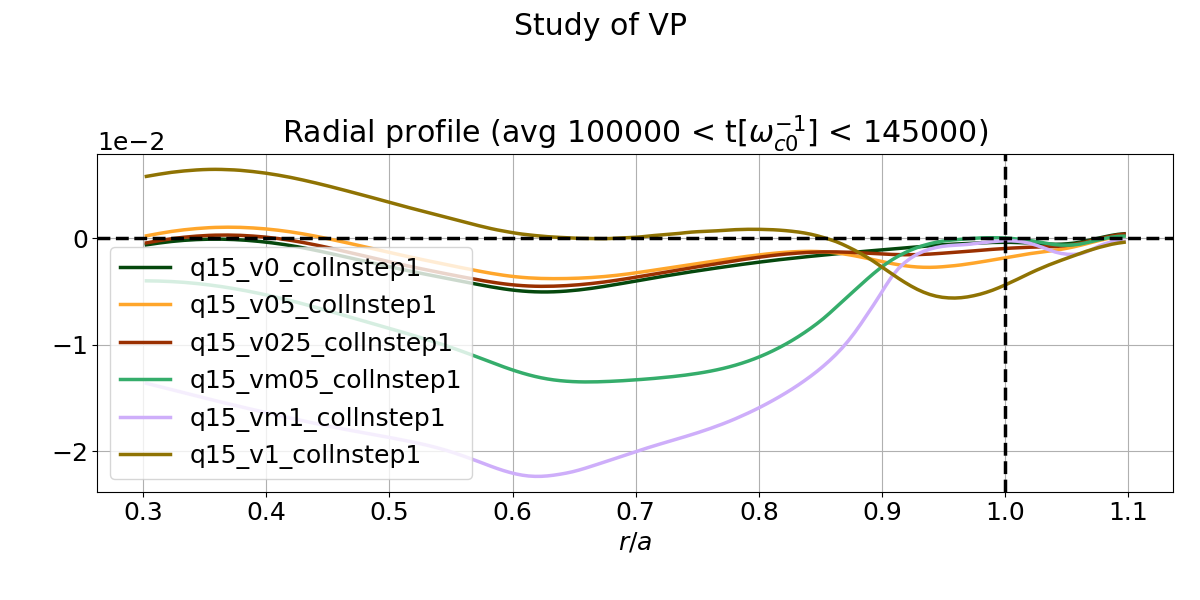

In [39]:
plt.close('all')

fig = plt.figure(figsize=(12,6))
ax_rprof = fig.add_subplot(111)

def update_plot(param,float_range_time,
                select_sim,dpi_adjust):

    q_ar = [q for q in all_sim if q['title'] in select_sim]
    tmin_avg,tmax_avg = float_range_time
    
    color1 = 'xkcd:cerulean'
    color2 = 'xkcd:reddish orange'

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    ax_rprof.clear()

    ## Set axes customizations
    ax_rprof.set_title(r'Radial profile (avg %.0f < t$[\omega_{c0}^{-1}]$ < %.0f)' % (tmin_avg , tmax_avg) )
    fig.suptitle(r'Study of %s' %param)
    
    for q in q_ar:

        itmin_avg, itmax_avg = np.searchsorted(q['time'],[tmin_avg,tmax_avg])
        irhomin, irhomax     = np.searchsorted(q['rho'],[0.3,1.1])

        ax_rprof.plot(q['rho'][irhomin:irhomax], np.mean( q[param][itmin_avg:itmax_avg,irhomin:irhomax],axis=0),c=q['c'],label=q['title'])
        
        
    ## Axes customizations
    ax_rprof.set_xlabel(r'$r/a$')
    ax_rprof.axhline(y=0,c='k',ls='--')
    ax_rprof.axvline(x=1,c='k',ls='--')
    ax_rprof.legend()

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
float_range_time_slider = widgets.FloatRangeSlider(value=[100e3, 145e3], min=0, max=250e3, step=1000, description='Time range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_time = float_range_time_slider,
         **custom_widgets
        )

## <font color='red'>**Résultat**</font> - Impact du paramètre "coll_nstep" [▲](#sommaire)

interactive(children=(FloatRangeSlider(value=(0.45, 0.55), continuous_update=False, description='rho range', l…

<function __main__.update_plot(float_range_rho, dpi_adjust)>

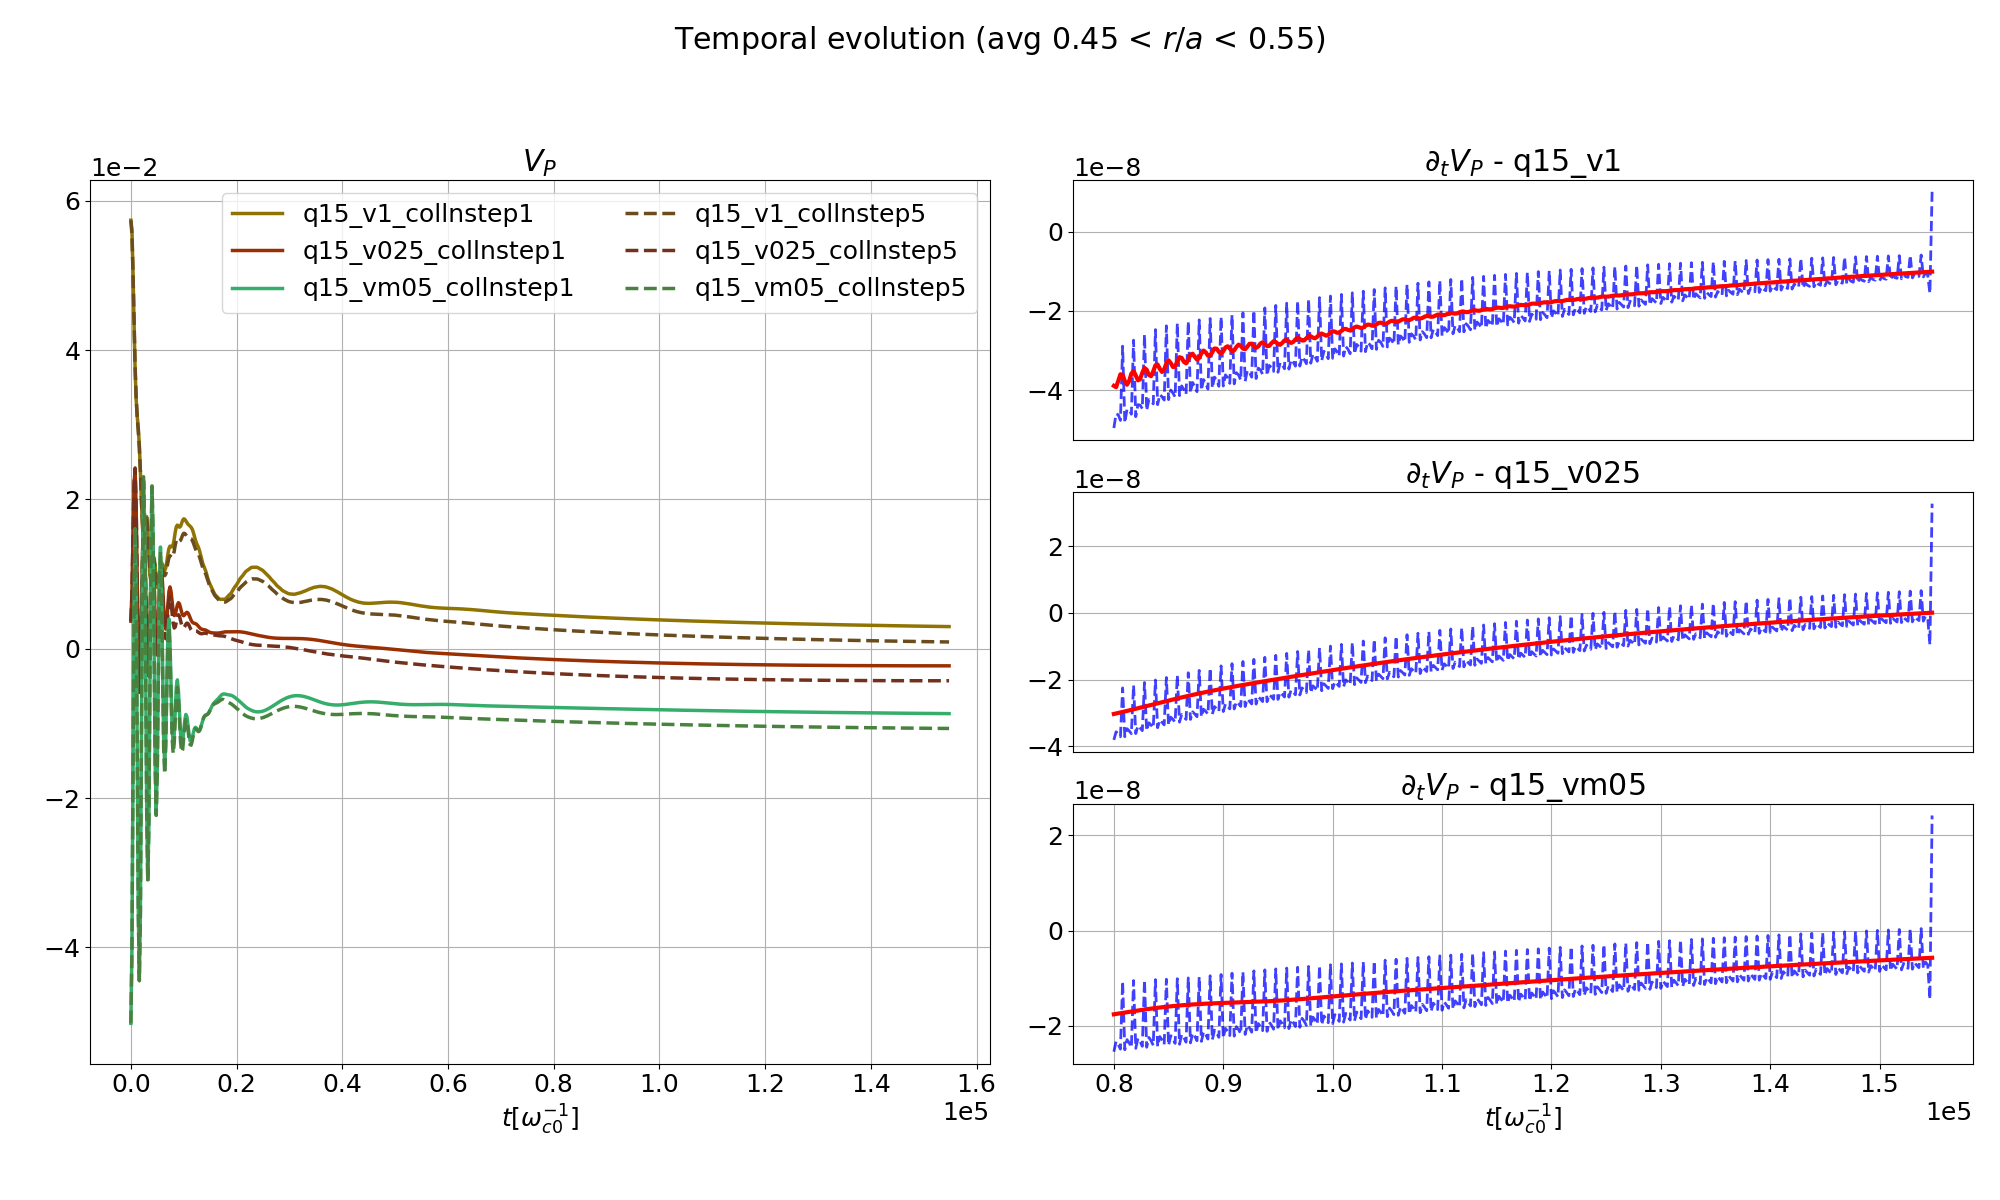

In [56]:
plt.close('all')

fig = plt.figure(figsize=(20,12))

for q in [q15_v1_new, q15_v05_new, q15_v025_new, q15_v0_new, q15_vm05_new, q15_vm1_new]:
    q['alpha'] = 1
    q['lw'] = 3
for q in [q15_v1, q15_v05, q15_v025, q15_v0, q15_vm05, q15_vm1]:
    q['alpha'] = 0.75
    q['lw'] = 2

q_ar_collnstep5 = [q15_v1, q15_v05, q15_v025, q15_v0, q15_vm05, q15_vm1]
q_ar_collnstep1 = [q15_v1_new, q15_v05_new, q15_v025_new, q15_v0_new, q15_vm05_new, q15_vm1_new]

gs = gridspec.GridSpec(1, 2, figure=fig)

def update_plot(float_range_rho,dpi_adjust):

    rhomin_avg,rhomax_avg = float_range_rho

    ## Set dpi of figure
    fig.set_dpi(dpi_adjust)

    ## Clear previous plot
    fig.clf()

    ax_tevol = fig.add_subplot(gs[0]); ax_tevol.set_title(r'$V_P$')

    gssub = gs[1].subgridspec(len(q_ar_collnstep1[::2]),1)

    #ax_tevol2 = fig.add_subplot(122); ax_tevol2.set_title(r'$\partial_t V_P$')

    ## Set axes customizations
    fig.suptitle(r'Temporal evolution (avg %.2f < $r/a$ < %.2f)' % (rhomin_avg , rhomax_avg) )

    for iq,q in enumerate(zip(q_ar_collnstep1[::2],q_ar_collnstep5[::2])):

        irhomin, irhomax     = np.searchsorted(q[0]['rho'],[rhomin_avg,rhomax_avg])

        ## Plot temporal evolution
        ax_tevol.plot(q[0]['time'], np.mean( q[0]['VP'][:,irhomin:irhomax],axis=1),c=q[0]['c'],ls=q[0]['ls'],label=q[0]['title'])
        ax_tevol.plot(q[1]['time'], np.mean( q[1]['VP'][:,irhomin:irhomax],axis=1),c=q[1]['c'],ls=q[1]['ls'],label=q[1]['title'])

        it_plot = np.searchsorted(q[0]['time'],0.8e5)

        ax_tevol2 = fig.add_subplot(gssub[iq,0]); ax_tevol2.set_title(r'$\partial_t V_P$ - ' + q[0]['title'][:-11])
        ax_tevol2.plot(q[1]['time'][it_plot:], np.mean( q[1]['dtVP'][it_plot:,irhomin:irhomax],axis=1),c='b',ls=q[1]['ls'],lw=q[1]['lw'],alpha=q[1]['alpha'],label=q[1]['title'])
        ax_tevol2.plot(q[0]['time'][it_plot:], np.mean( q[0]['dtVP'][it_plot:,irhomin:irhomax],axis=1),c='r',ls=q[0]['ls'],lw=q[0]['lw'],alpha=q[0]['alpha'],label=q[0]['title'])
        if iq!=(len(q_ar_collnstep1[::2])-1): ax_tevol2.set_xticks([])
        else: ax_tevol2.set_xlabel(r'$t[\omega_{c0}^{-1}]$')

    ## Axes customizations
    ax_tevol.set_xlabel(r'$t[\omega_{c0}^{-1}]$')

    ## List legend elements in custom column
    handles, labels = ax_tevol.get_legend_handles_labels()
    custom_handles = np.concatenate((handles[::2], handles[1::2]))
    custom_labels = np.concatenate((labels[::2], labels[1::2]))
    ax_tevol.legend(custom_handles, custom_labels, ncol=2)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

float_range_rho_slider  = widgets.FloatRangeSlider(value=[0.45, 0.55], min=0.1, max=1.3, step=0.01, description='rho range', layout=Layout(width='50%'), continuous_update=False)

interact(update_plot, 
         float_range_rho  = float_range_rho_slider,
         dpi_adjust = widgets.IntSlider(min=30, max=200, step=1,value=dpi_custom, continuous_update=False)
        )

## <font color='red'>**Résultat**</font> - $\mu_i$ Gianakon dans les simulations

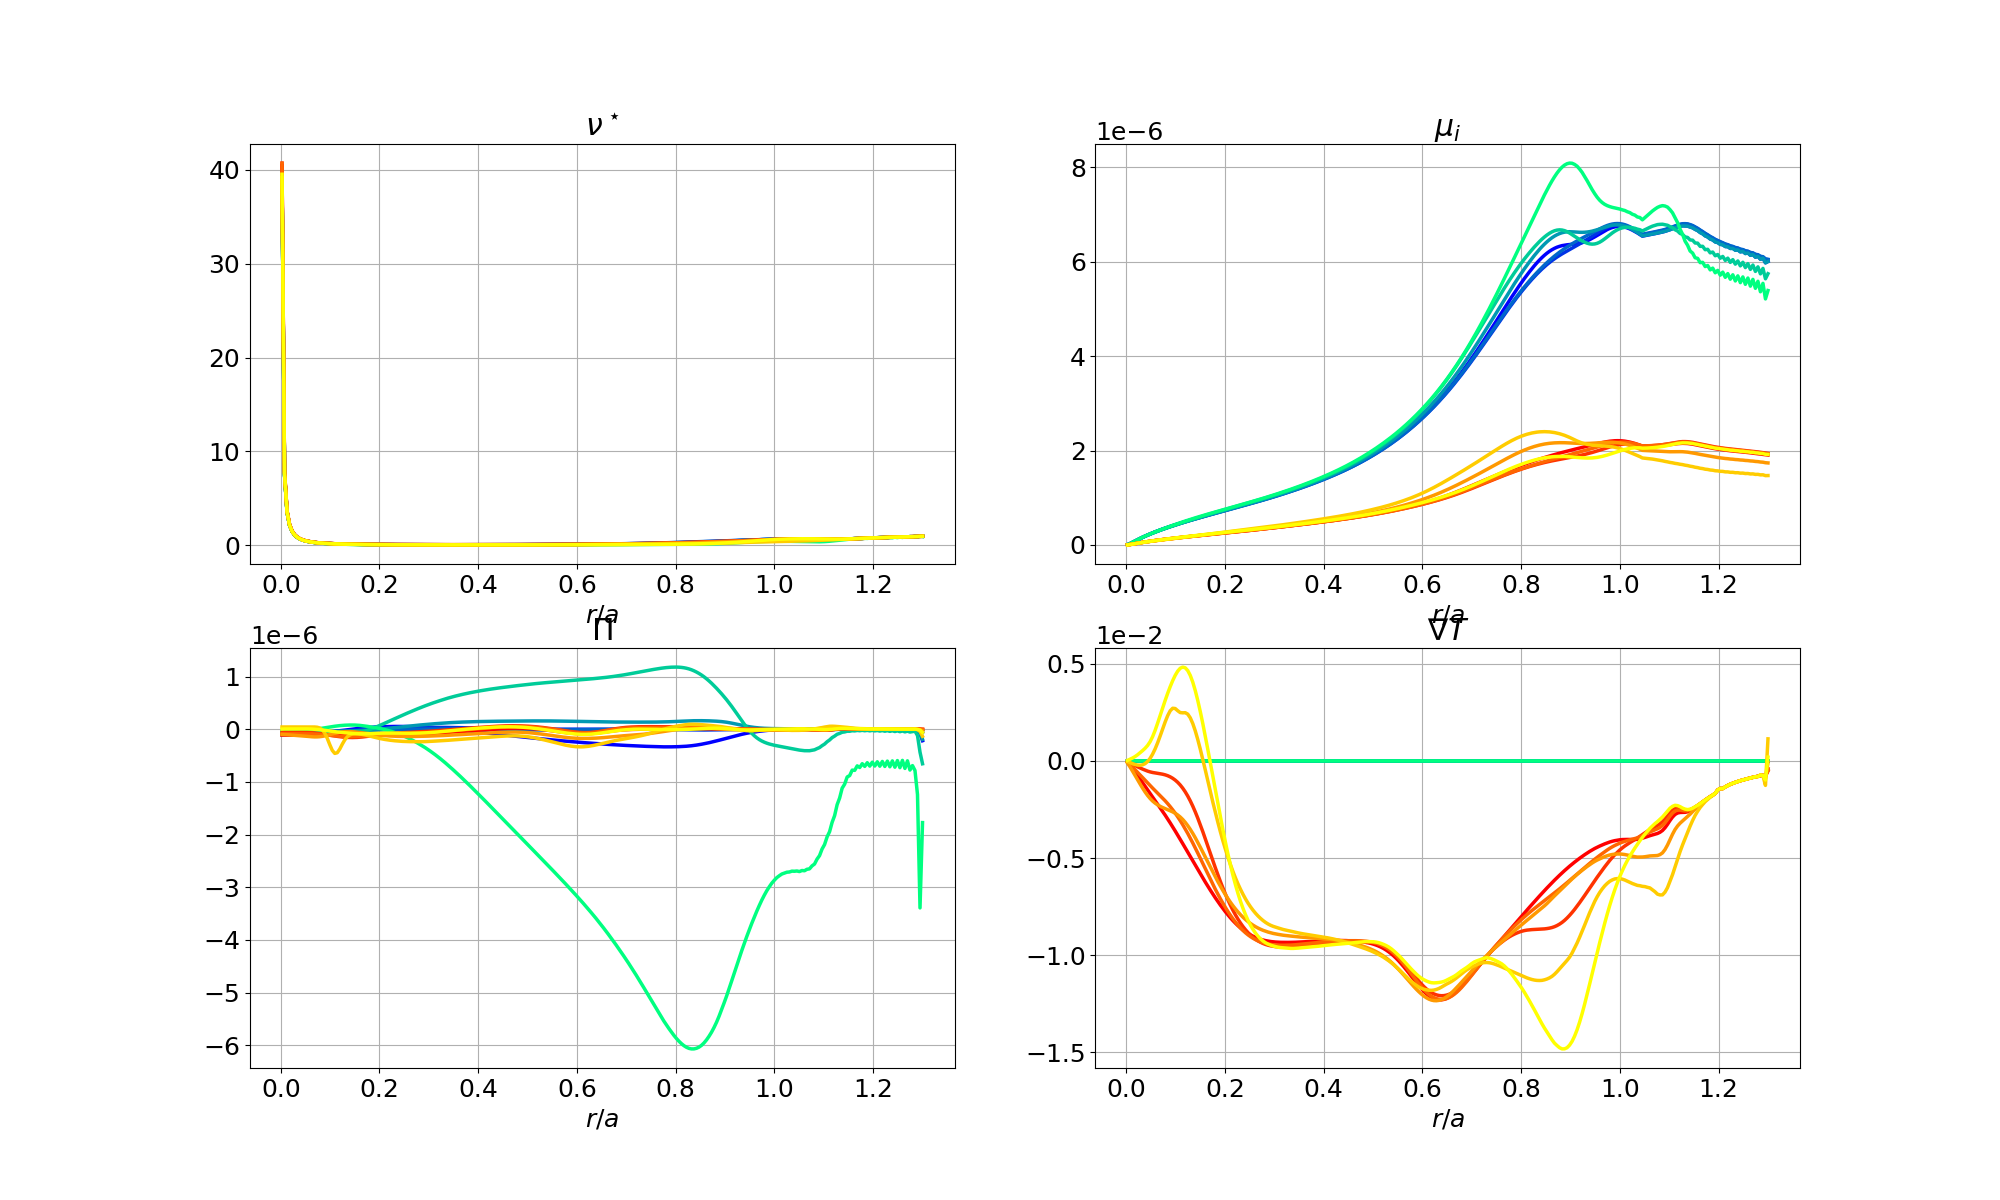

In [6]:
import matplotlib.cm as cm

plt.close('all')

rho = q05_v1['rho']
qprof05 = q05_v1['q']
qprof15 = q15_v1['q']

q05_ar = [q05_v05, q05_v025, q05_v0, q05_vm05, q05_vm1, q05_v1]
q15_ar = [q15_v0_new, q15_v05_new, q15_v025_new, q15_vm05_new, q15_vm1_new, q15_v1_new]

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(221)
# Create a color gradient array based on a colormap
colors_q05 = cm.winter(np.linspace(0, 1, len(q05_ar)))
colors_q15 = cm.autumn(np.linspace(0, 1, len(q15_ar)))

ax.set_xlabel(r'$r/a$')
ax.set_title(r'$\nu^\star$')

ax2 = fig.add_subplot(222)

ax2.set_xlabel(r'$r/a$')
ax2.set_title(r'$\mu_i$')

ax3 = fig.add_subplot(223)

ax3.set_xlabel(r'$r/a$')
ax3.set_title(r'$\Pi$')

ax4 = fig.add_subplot(224)

ax4.set_xlabel(r'$r/a$')
ax4.set_title(r'$\nabla T$')

for iq,q in enumerate(q05_ar):
    ax.plot(rho,q['nustar'][-1,:],label=r'$\nu^\star$',c=colors_q05[iq])
    ax2.plot(rho,q['nutheta_Gianakon'][-1,:],label=r'$\nu_\theta$',c=colors_q05[iq])
    ax3.plot(rho,q['RSpol'][-1,:],label=r'$\Pi$',c=colors_q05[iq])
    ax4.plot(rho,q['RSpol'][-1,:],label=r'$\nabla T$',c=colors_q05[iq])
for iq,q in enumerate(q15_ar):    
    ax.plot(rho,q['nustar'][-1,:],label=r'$\nu^\star$',c=colors_q15[iq])
    ax2.plot(rho,q['nutheta_Gianakon'][-1,:],label=r'$\nu_\theta$',c=colors_q15[iq])
    ax3.plot(rho,q['RSpol'][-1,:],label=r'$\Pi$',c=colors_q15[iq])
    ax4.plot(rho,q['drT'][-1,:],label=r'$\nabla T$',c=colors_q15[iq])
